# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [5]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [6]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [7]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [8]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [9]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [10]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [11]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [12]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [13]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.15494612549589393),
 ('Gender_Female', -131.02501325554573),
 ('Gender_Male', 131.02501325554596),
 ('City_Tier 1', 76.76432601049554),
 ('City_Tier 2', 55.13897430923221),
 ('City_Tier 3', -131.9033003197279),
 ('Record', 772.2334457445646)]

In [14]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
    
    * Total_Spend = -79.41713030137362 + 'Monthly Income' * 0.1475389804920575 + 
     'Transaction Time' * 0.15494612549589393 + 'Gender_Female' * -131.02501325554573 +
     'Gender_Male' * 131.02501325554596 + 'City_Tier 1' * 76.76432601049554 + 
     'City_Tier 2' * 55.13897430923221 + 'City_Tier 3' * -131.9033003197279 +
     'Record' * 772.2334457445646

#### Otra forma más simple de calcular las predicciones
* df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [15]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income'] * 0.1475389804920575 + df_new['Transaction Time'] * 0.15494612549589393 + df_new['Gender_Female'] *(-131.02501325554573) + df_new['Gender_Male'] * 131.02501325554596 + df_new['City_Tier 1'] * 76.76432601049554 + df_new['City_Tier 2'] * 55.13897430923221 + df_new['City_Tier 3'] * -131.9033003197279 + df_new['Record'] * 772.2334457445646

In [16]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [17]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [18]:
SSD

1517733985.3408165

In [19]:
RSE = np.sqrt(SSD / (len(df_new)-len(feature_cols)-1))

In [20]:
RSE

803.1318809818166

In [21]:
sales_mean = np.mean(df_new["Total Spend"])

In [22]:
sales_mean

6163.176415976715

In [23]:
error = RSE / sales_mean
error * 100

13.03113568029416

## Eliminar variables dummy redundantes

In [24]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [25]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [26]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [27]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Male", "City_Tier 2", 
                "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [28]:
print(lm.intercept_)

-133.67781754642056


In [29]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205752),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Male', 262.0500265110946),
 ('City_Tier 2', -21.62535170126243),
 ('City_Tier 3', -208.66762633022333),
 ('Record', 772.2334457445633)]

In [30]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.1475389804920575),
* ('Transaction Time', 0.15494612549589393),
* ('Gender_Female', -131.02501325554573),
* ('Gender_Male', 131.02501325554596),
* ('City_Tier 1', 76.76432601049554),
* ('City_Tier 2', 55.13897430923221),
* ('City_Tier 3', -131.9033003197279),
* ('Record', 772.2334457445646)]
    
Coeficientes tras enmascarar las variables dummy pertinentes
* ('Monthly Income', 0.14753898049205752),
* ('Transaction Time', 0.1549461254958957),
* ('Gender_Male', 262.0500265110946),
* ('City_Tier 2', -21.62535170126243),
* ('City_Tier 3', -208.66762633022333),
* ('Record', 772.2334457445633)]

Los cambios se reflejan en:
* Gender_Male: 
    * antes -> 131.02, 
    * despúes -> 262.05 = (131.02 - (-131.02))
* Gender_Female: 
    * antes -> 131.02, 
    * despúes -> 0
* CT1: 
    * antes -> 76.76, 
    * despúes -> 0
* CT2: 
    * antes -> 55.13, 
    * despúes -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * despúes -> -208.66 = (-131.90 - 76.76)

# Transformación de variables para conseguir una relación no lineal

In [31]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")

In [33]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Consumo (millas x galeón)')

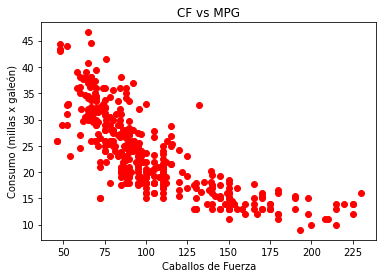

In [37]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.title("CF vs MPG")
plt.xlabel("Caballos de Fuerza")
plt.ylabel("Consumo (millas x galeón)")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [43]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
ln = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

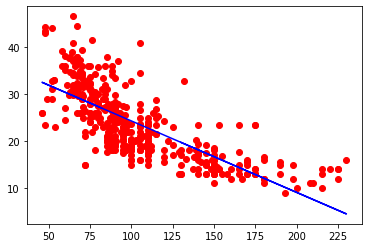

In [45]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [46]:
lm.score(X_data, Y)

0.5746533406450252

In [48]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data)-1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(10315.751960060918,
 5.046879480825511,
 23.514572864321607,
 0.21462773361633472)

## Modelo de regresión cuadrático
* mpg = a + b * horsepower²

In [49]:
X_data = X**2
X_data = X_data[:,np.newaxis]

/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [51]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [54]:
lm.score(X_data, Y)

0.4849887034823205

In [55]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data)-1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(12490.350340501926,
 5.553410772769817,
 23.514572864321607,
 0.23616889852998113)

## Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower²

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [58]:
poly = PolynomialFeatures(degree=2)

In [60]:
X_data = poly.fit_transform(X[:, np.newaxis])

/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [62]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [63]:
lm.score(X_data, Y)

0.6439066584257469

In [64]:
lm.intercept_

55.026192447081144

In [65]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 - 0.434 * hp + 0.0011 * hp²

In [80]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado: "+str(d))
    print(lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado: 2
0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.514572864321607, error: 19.6379546619069
Regresión de grado: 3
0.6444678885560744
58.4487741114846
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.514572864321607, error: 19.622473106036686
Regresión de grado: 4
0.6467674189704503
40.09664385588606
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.79983249135, RSE: 4.599194731579757, Y_mean: 23.514572864321607, error: 19.558912501268786
Regresión de grado: 5
0.6547512491821714
-40.693991930831814
[ 0.00000000e+00  4.00021891e+00 -7.54802464e-02  6.19621639e-04
 -2.36220984e-06  3.41983064e-09]
SSD: 8373.17138768294, RSE: 4.546921733825878, Y_mean: 23.514572864321607, error: 19.336612066319393


/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Thi

In [79]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD / (len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE / y_mean
    print("SSD: "+str(SSD)+", RSE: "+str(RSE)+", Y_mean: "+ str(y_mean)+ ", error: "+str(error*100))

# El problema de los outliers

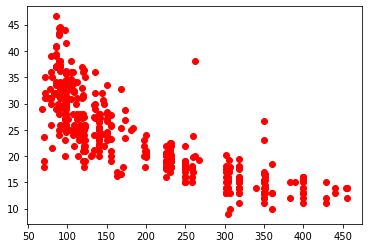

In [81]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [85]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


LinearRegression()

In [86]:
lm.score(X,Y)

0.6261049762826918

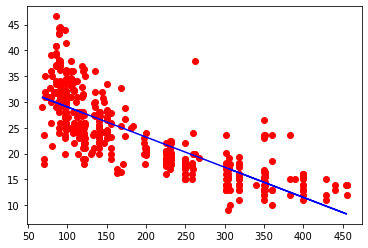

In [87]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")

In [90]:
data_auto[(data_auto["displacement"] > 250) & (data_auto["mpg"] > 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [105]:
data_auto[(data_auto["displacement"] > 250) & (data_auto["mpg"] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
307,23.9,8,260.0,90.0,3420,22.2,79,1,oldsmobile cutlass salon brougham
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [106]:
data_auto_clean = data_auto.drop([305, 258, 372, 395, 307])

In [107]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


LinearRegression()

In [108]:
lm.score(X,Y)

0.6474495118320847

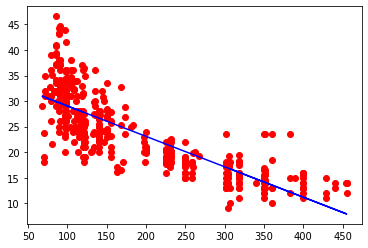

In [109]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")

# Resumen de la Regresión Lineal

* La regresion lineal asume una relacion lineal entre las variables predictoras (o las variables de entrada) y las variables de salida, en caso de tener una sola variables predictora seria un modelo de regresion  lineal simple y en el caso de tener mas de una variable es un modelo de regresion lineal multiple.

* Los coeficientes en una regresion lineal en el modelo, se estiman utilizando una tecnica que se llama la suma de minimos cuadraticos, python tenemos **(statsmodel.api y sklearn)**

* Para identificar si un modelo es bueno o malo, tenemos en primer lugar el coeficiente de determinacion **R²**, sirve para medir la eficiencia de los mismos, explicando el error entre la variable que hemos predecido a traves del modelo y el valor actual, cuanto mas grande sea el valor de **R²** menor sera el error cometido y por lo tanto mejor será el modelo.

* El modelo tambien utiliza una serie de parametro, una serie de estadisticos en particular **p** valores asociados a cada uno de los coeficientes. Cual es la probabilidad que sean o no sean cero en el modelo. El estadistico **F** asociado a cada uno de los **p** valores y tambien el error estandar de los residuos **(RSE)**, son tres de los parametros que deben de ser analizados para poder aportar mas informacion acerca de la eficacia del modelo que hemos creado.

* Uno de los problemas que hemos visto al aplicar la regresion lineal multiple que es el problema de la **Multicolinealidad** es cuando dos de las variables de entrada tienen una correlacion bastante alta, esto lo que hace es aumentar la variabilidad en el coeficiente estimado para las variables que estan correlacionadas y hay que calcular el factor de inflacion de la varianza el **VIF** para seleccionar que variable tiene dicho factor demasiado elevado y excluirlas para reducir el problema de la multicolinealidad.

* Un dataset se puede dividir en un conjunto de entrenamiento y un conjunto de testing antes de empezar el proceso de modelado es un paso muy necesario para validar que el modelo no sufre de **overfitting** que se ajusta solo a los datos con los que entrenamos  y no a los que queremos predecir.

* Hemos visto tambien la incluicion o la eliminacion de una variable del modelo puede cambiar mucho el resultado, con **sklearn** tiene un conjunto de metodos preparados para incluir o la eliminacion de variables de forma automatica.

* Tambien hemos utilizado variables categoricas en los dataset a traves de su conversion en variables **dummy**. Si una variable categorica tiene **n** posibles categorias solo se necesita **n-1** variables categoricas para crear el modelo.

* Y por ultimo hemos visto que una variables necesitaran ser tranformadas antes de encontrar un modelo lineal que se ajuste a ellas o que a veces incluso el modelo lineal no sea el adecuado si no que una variable puede exhibir relaciones polinomiales de grado 2, grado 3 o hasta grado n con respecto a sus variables predictoras.